In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_cleaned = pd.read_csv('../datasets/fire_knowledge.csv')
#df_cleaned = df.copy()
#df_cleaned.head()
#df_cleaned = df_cleaned.drop('Incident_Ward', axis=1)
df_cleaned = df_cleaned.drop(['Unnamed: 0', 'Ext_agent_app_or_defer_time'], axis=1)
df_cleaned.head()
#df_cleaned.to_csv("fire_knowledge.csv")

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,...,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,No business interruption,0,86,3000,0,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,...,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24T16:49:36,2018-08-24T16:54:09
1,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),1,16,1000000,130,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,...,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09T17:45:07,2017-02-09T17:48:49
2,Undetermined (formerly 98),May not resume operations,0,12,1000000,14,Entire Structure,Undetermined,Fire alarm system operation undetermined,Undetermined,...,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Retail Store,Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30T00:42:01,2012-10-30T00:44:58
3,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),8,11,125000,2,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,...,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08T04:08:50,2018-07-08T04:13:54
4,Engine Area,No business interruption,0,11,100000,0,Confined to object of origin,"Not applicable: No fire alarm system, no perso...",Not applicable (no system),No Fire alarm system,...,-79.399979,Electrical Wiring Insulation,Extinguished by fire department,Electrical Failure,Detached Dwelling,Not applicable: Alarm operated OR presence/ope...,Not applicable - no smoke alarm or presence un...,Flames showing from small area (one storey or ...,2019-02-18T10:19:01,2019-02-18T10:23:27


In [2]:
# Import the encoding library
from sklearn.preprocessing import OrdinalEncoder
# Create an instance of Ordinal Encoder.
ordinalencoder = OrdinalEncoder()

# Create a list of all the categorical features
cols = ['Area_of_Origin', 'Business_Impact', 'Extent_Of_Fire', 
        'Fire_Alarm_System_Impact_on_Evacuation',
        'Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence', 
        'Ignition_Source', 'Material_First_Ignited',
        'Method_Of_Fire_Control', 'Possible_Cause', 'Property_Use', 
        'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
        'Smoke_Alarm_at_Fire_Origin_Alarm_Type', 
        'Status_of_Fire_On_Arrival']

# Fit ordinal encoder and return encoded label
df_cleaned[cols] = ordinalencoder.fit_transform(df_cleaned[cols])
df_cleaned.head(10)

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,...,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,16.0,4.0,0,86,3000,0,0.0,4.0,0.0,0.0,...,-79.412479,31.0,2.0,19.0,20.0,4.0,1.0,3.0,2018-08-24T16:49:36,2018-08-24T16:54:09
1,11.0,5.0,1,16,1000000,130,8.0,5.0,1.0,0.0,...,-79.373460,31.0,2.0,19.0,20.0,4.0,1.0,5.0,2017-02-09T17:45:07,2017-02-09T17:48:49
2,22.0,0.0,0,12,1000000,14,3.0,6.0,2.0,3.0,...,-79.393700,31.0,2.0,19.0,28.0,4.0,4.0,4.0,2012-10-30T00:42:01,2012-10-30T00:44:58
3,19.0,5.0,8,11,125000,2,8.0,5.0,1.0,0.0,...,-79.511539,2.0,2.0,14.0,20.0,4.0,2.0,2.0,2018-07-08T04:08:50,2018-07-08T04:13:54
4,5.0,4.0,0,11,100000,0,0.0,3.0,3.0,1.0,...,-79.399979,9.0,2.0,2.0,3.0,4.0,3.0,5.0,2019-02-18T10:19:01,2019-02-18T10:23:27
5,2.0,4.0,8,11,50000,40,1.0,3.0,3.0,1.0,...,-79.443970,7.0,2.0,17.0,20.0,6.0,0.0,2.0,2014-06-09T16:05:44,2014-06-09T16:09:50
6,11.0,6.0,0,10,250000,10,8.0,6.0,2.0,3.0,...,-79.398640,31.0,2.0,19.0,29.0,6.0,4.0,3.0,2014-03-20T01:53:12,2014-03-20T01:57:58
7,9.0,5.0,2,10,450000,200,10.0,5.0,1.0,0.0,...,-79.350870,9.0,2.0,2.0,20.0,4.0,2.0,2.0,2011-02-15T23:22:11,2011-02-15T23:26:53
8,10.0,5.0,0,7,10000,4,1.0,3.0,3.0,2.0,...,-79.436722,22.0,2.0,2.0,31.0,3.0,0.0,2.0,2018-05-11T07:06:07,2018-05-11T07:09:39
9,19.0,4.0,0,7,220000,4,8.0,0.0,1.0,0.0,...,-79.509780,19.0,2.0,19.0,20.0,4.0,1.0,5.0,2015-04-25T14:16:22,2015-04-25T14:20:18


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Separare le features dal target
df_c = df_cleaned.copy()
# Rimuovere la colonna target dal DataFrame
df_c = df_c.drop(["TFS_Alarm_Time", "TFS_Arrival_Time",
                  "Last_TFS_Unit_Clear_Time", "Fire_Under_Control_Time"], axis=1)
X = df_c.drop('Estimated_Dollar_Loss', axis=1)
y = df_c['Estimated_Dollar_Loss']

# Dividere il dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Addestrare l'algoritmo di Random Forest sul training set
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Ottenere l'importanza delle feature
feature_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

# Visualizzare le feature importance
print(feature_importances)


# Creare un grafico a barre per le feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y=feature_importances.index, data=feature_importances)

# Aggiungere titolo e etichette agli assi
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')

# Mostrare il grafico
#plt.show()

                                          importance
Longitude                                   0.262798
Estimated_Number_Of_Persons_Displaced       0.119484
Extent_Of_Fire                              0.096571
Business_Impact                             0.077021
Latitude                                    0.074277
Fire_Alarm_System_Impact_on_Evacuation      0.073565
Property_Use                                0.062359
Area_of_Origin                              0.042948
Ignition_Source                             0.041340
Incident_Station_Area                       0.029829
Status_of_Fire_On_Arrival                   0.027547
Fire_Alarm_System_Operation                 0.018029
Fire_Alarm_System_Presence                  0.016421
Possible_Cause                              0.014833
Material_First_Ignited                      0.012016
Smoke_Alarm_at_Fire_Origin_Alarm_Failure    0.010870
Smoke_Alarm_at_Fire_Origin_Alarm_Type       0.009633
Method_Of_Fire_Control                      0.

Miglior numero di feature: 10
MSE associato: 42247589795.61684


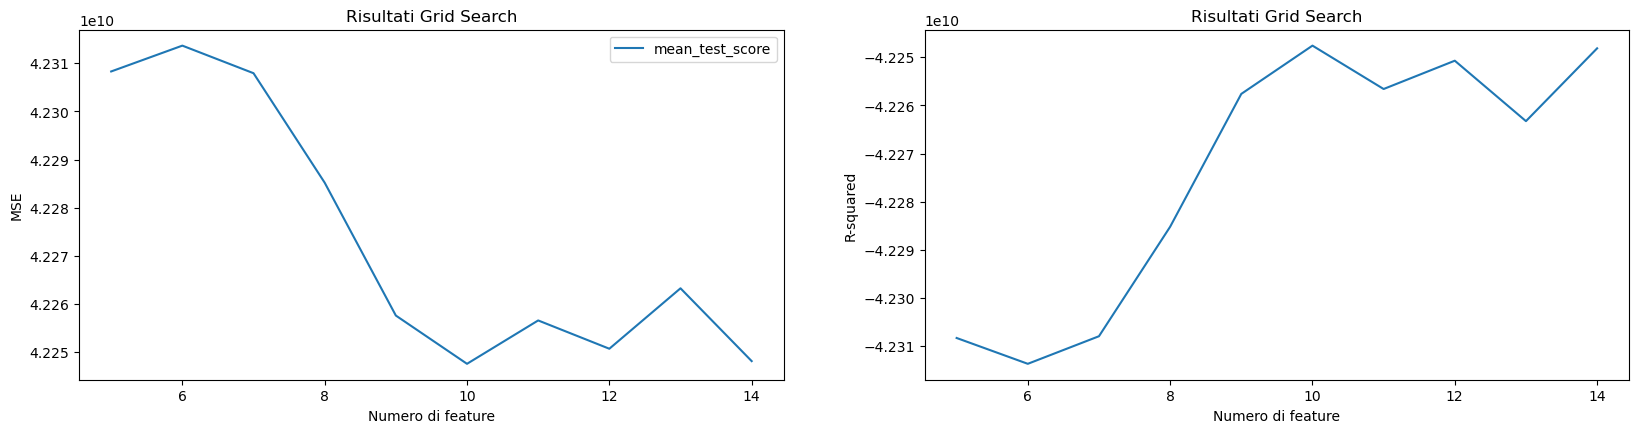

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Creare un oggetto di tipo LinearRegression()
model = LinearRegression()

# Creare un oggetto di tipo RFE
rfe = RFE(model)

# Creare una pipeline che esegue l'RFE e la regressione lineare
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# Creare un dizionario dei parametri da testare con la grid search
params = {'s__n_features_to_select':range(5,15)}

# Creare un oggetto di tipo GridSearchCV per eseguire la ricerca
grid_search = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_squared_error')

# Eseguire la grid search sul dataset
grid_search.fit(X, y)

# Stampare il miglior parametro trovato e la performance associata
print("Miglior numero di feature:", grid_search.best_params_['s__n_features_to_select'])
print("MSE associato:", abs(grid_search.best_score_))

r_squared = grid_search.cv_results_['mean_test_score']
# Plot dei risultati della grid search
features_num = range(5,15)
fig= plt.figure(figsize=(20,10))
ax=fig.add_subplot(221)
plt.plot(features_num, abs(grid_search.cv_results_['mean_test_score']), label='mean_test_score')
plt.xlabel('Numero di feature')
plt.ylabel('MSE')
plt.title('Risultati Grid Search')
plt.legend()

ax=fig.add_subplot(222)
plt.plot(features_num, r_squared)
plt.xlabel('Numero di feature')
plt.ylabel('R-squared')
plt.title('Risultati Grid Search')

plt.show()

In [5]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Definire il numero di features da selezionare
n_features = 10

# Creare un oggetto modello di regressione lineare
model = LinearRegression()

#Creare un oggetto RFE e specificare il modello
rfe = RFE(model, n_features_to_select=10)

# Separare le features dal target
df_c = df_cleaned.copy()
# Rimuovere la colonna target dal DataFrame
df_c = df_c.drop(["TFS_Alarm_Time", "TFS_Arrival_Time",
                  "Last_TFS_Unit_Clear_Time", "Fire_Under_Control_Time"], axis=1)
X = df_c.drop('Estimated_Dollar_Loss', axis=1)
y = df_c['Estimated_Dollar_Loss']
rfe.fit(X, y)

# Visualizzare le feature selezionate e il loro ranking
print("Selected Features:")
for i in range(len(rfe.support_)):
    if rfe.support_[i]:
        print(X.columns[i])
print("Feature Rankings:")
print(rfe.ranking_)

# Creare un dizionario che mappa gli indici delle feature con i loro nomi
feature_dict = dict(zip(range(len(X.columns)), X.columns))

# Stampare il ranking delle feature con i loro nomi
for i in range(len(rfe.ranking_)):
    print("Rank:", rfe.ranking_[i], " - Feature:", feature_dict[i])


Selected Features:
Business_Impact
Civilian_Casualties
Count_of_Persons_Rescued
Extent_Of_Fire
Fire_Alarm_System_Presence
Latitude
Longitude
Method_Of_Fire_Control
Smoke_Alarm_at_Fire_Origin_Alarm_Type
Status_of_Fire_On_Arrival
Feature Rankings:
[ 9  1  1  1 10  1  3  4  1  7 11  1  1  8  1  5  6  2  1  1]
Rank: 9  - Feature: Area_of_Origin
Rank: 1  - Feature: Business_Impact
Rank: 1  - Feature: Civilian_Casualties
Rank: 1  - Feature: Count_of_Persons_Rescued
Rank: 10  - Feature: Estimated_Number_Of_Persons_Displaced
Rank: 1  - Feature: Extent_Of_Fire
Rank: 3  - Feature: Fire_Alarm_System_Impact_on_Evacuation
Rank: 4  - Feature: Fire_Alarm_System_Operation
Rank: 1  - Feature: Fire_Alarm_System_Presence
Rank: 7  - Feature: Ignition_Source
Rank: 11  - Feature: Incident_Station_Area
Rank: 1  - Feature: Latitude
Rank: 1  - Feature: Longitude
Rank: 8  - Feature: Material_First_Ignited
Rank: 1  - Feature: Method_Of_Fire_Control
Rank: 5  - Feature: Possible_Cause
Rank: 6  - Feature: Property_

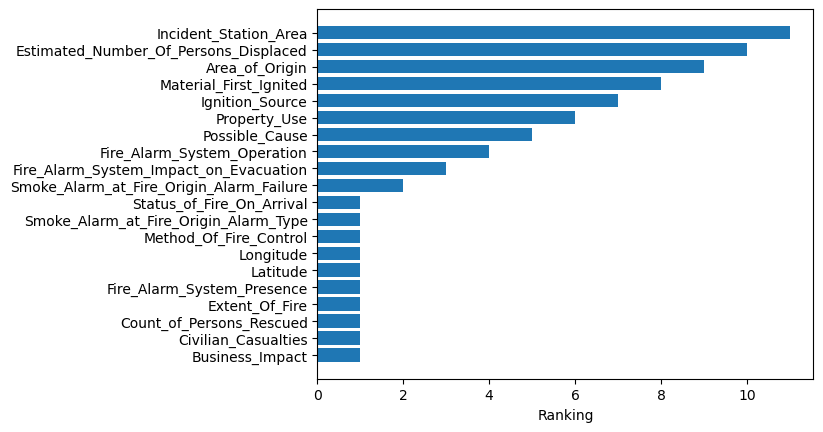

In [6]:
import matplotlib.pyplot as plt

# Creare un dizionario che associa il nome della feature al suo ranking
feature_ranking = dict(zip(X.columns, rfe.ranking_))

# Ordinare le feature in base al loro ranking
sorted_features = sorted(feature_ranking, key=feature_ranking.get)

# Creare un grafico a barre
plt.barh(range(len(sorted_features)), [feature_ranking[feat] for feat in sorted_features], align='center')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Ranking')
plt.show()


In [7]:
import statsmodels.api as sm

# Separare le features dal target
X = df_c.drop("Estimated_Dollar_Loss", axis=1)
y = df_c["Estimated_Dollar_Loss"]

# Aggiungere una colonna di intercetta al DataFrame delle features
X = sm.add_constant(X)

# Creare un modello di regressione lineare
model = sm.OLS(y, X)

# Addestrare il modello sui dati
results = model.fit()

# Mostrare i risultati del modello utilizzando la funzione summary()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Estimated_Dollar_Loss   R-squared:                       0.050
Model:                               OLS   Adj. R-squared:                  0.049
Method:                    Least Squares   F-statistic:                     28.12
Date:                   Wed, 10 May 2023   Prob (F-statistic):          1.96e-103
Time:                           12:38:18   Log-Likelihood:            -1.4485e+05
No. Observations:                  10616   AIC:                         2.897e+05
Df Residuals:                      10595   BIC:                         2.899e+05
Df Model:                             20                                         
Covariance Type:               nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                    -3.661e+06   2.93e+06     -1.249      0.212   -9.41e+06    2.08e+06
Area_of_Origin                            -393.4479    314.348     -1.252      0.211   -1009.630     222.734
Business_Impact                          -6636.3557   2136.616     -3.106      0.002   -1.08e+04   -2448.187
Civilian_Casualties                       7558.0842   4466.271      1.692      0.091   -1196.647    1.63e+04
Count_of_Persons_Rescued                  3310.7926   2138.113      1.548      0.122    -880.311    7501.896
Estimated_Number_Of_Persons_Displaced      284.4722     83.340      3.413      0.001     121.111     447.833
Extent_Of_Fire                            1.259e+04    745.073     16.893      0.000    1.11e+04     1.4e+04
Fire_Alarm_System_Impact_on_Evacuation    1232.9944   1103.688      1.117      0.264    -930.442    3396.431
Fire_Alarm_System_Operation              -2039.8484   2481.515     -0.822      0.411   -6904.084    2824.387
Fire_Alarm_System_Presence                4405.8057   2540.054      1.735      0.083    -573.177    9384.789
Ignition_Source                           -324.6615    561.922     -0.578      0.563   -1426.133     776.810
Incident_Station_Area                       11.8286     25.372      0.466      0.641     -37.906      61.563
Latitude                                  3.618e+04   5.15e+04      0.703      0.482   -6.48e+04    1.37e+05
Longitude                                 -2.64e+04   2.18e+04     -1.209      0.227   -6.92e+04    1.64e+04
Material_First_Ignited                     551.6608    228.195      2.418      0.016     104.357     998.965
Method_Of_Fire_Control                   -3781.6000   2953.973     -1.280      0.201   -9571.942    2008.742
Possible_Cause                             770.5093    311.603      2.473      0.013     159.710    1381.309
Property_Use                              -640.2411    208.816     -3.066      0.002   -1049.559    -230.923
Smoke_Alarm_at_Fire_Origin_Alarm_Failure -1228.9200   1307.862     -0.940      0.347   -3792.576    1334.736
Smoke_Alarm_at_Fire_Origin_Alarm_Type     4054.0275   1490.260      2.720      0.007    1132.839    6975.216
Status_of_Fire_On_Arrival                 8026.2817   1514.371      5.300      0.000    5057.830     1.1e+04
==============================================================================
Omnibus:                    30796.707   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2015838442.388
Skew:                          39.860   Prob(JB):                         0.00
Kurtosis:                    2136.291   Cond. No.                     4.73e+05
=======================================

## Analisi distribuzione feature target

/tmp/ipykernel_10750/1915862248.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Estimated_Dollar_Loss'])


<AxesSubplot: xlabel='Estimated_Dollar_Loss', ylabel='Density'>

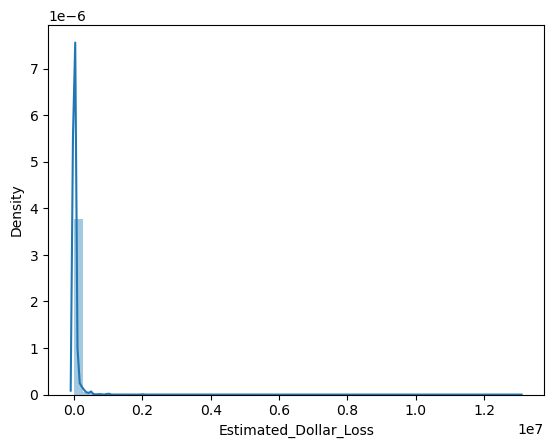

In [8]:
import seaborn as sns
sns.distplot(df_cleaned['Estimated_Dollar_Loss'])

/home/bob/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_10750/1356281859.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Estimated_Dollar_Loss'])


<AxesSubplot: xlabel='Estimated_Dollar_Loss', ylabel='Density'>

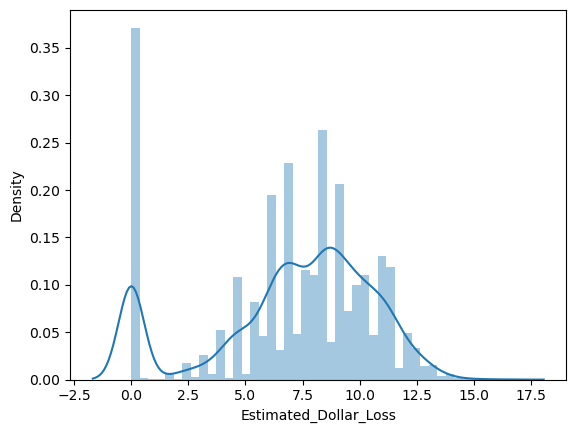

In [9]:
import numpy as np

Estimated_Dollar_Loss_Log = np.where(df_cleaned['Estimated_Dollar_Loss']!=0, np.log(df_cleaned['Estimated_Dollar_Loss']),  0)
df_cleaned['Estimated_Dollar_Loss'] = Estimated_Dollar_Loss_Log
# Check the new distribution after transformation
sns.distplot(df_cleaned['Estimated_Dollar_Loss'])

In [10]:
df_cleaned = df_cleaned.drop(['Fire_Under_Control_Time',
                               'Fire_Alarm_System_Impact_on_Evacuation', 
                               'Possible_Cause', 'Method_Of_Fire_Control', 'Civilian_Casualties',
                               'Count_of_Persons_Rescued', 'Fire_Alarm_System_Impact_on_Evacuation', 
                               'Smoke_Alarm_at_Fire_Origin_Alarm_Type', 
                               'TFS_Alarm_Time', 'TFS_Arrival_Time', 
                               'Last_TFS_Unit_Clear_Time'], axis=1)

In [11]:
df_cleaned.head()

,Area_of_Origin,Business_Impact,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Extent_Of_Fire,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Ignition_Source,Incident_Station_Area,Latitude,Longitude,Material_First_Ignited,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Status_of_Fire_On_Arrival
0,16.0,4.0,8.006368,0,0.0,0.0,0.0,14.0,114,43.760357,-79.412479,31.0,20.0,4.0,3.0
1,11.0,5.0,13.815511,130,8.0,1.0,0.0,14.0,325,43.657300,-79.373460,31.0,20.0,4.0,5.0
2,22.0,0.0,13.815511,14,3.0,2.0,3.0,14.0,332,43.649350,-79.393700,31.0,28.0,4.0,4.0
3,19.0,5.0,11.736069,2,8.0,1.0,0.0,5.0,442,43.697960,-79.511539,2.0,20.0,4.0,2.0
4,5.0,4.0,11.512925,0,0.0,3.0,1.0,15.0,121,43.741481,-79.399979,9.0,3.0,4.0,5.0


## Normalizzazione valori con Standard Scaler

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.model_selection import learning_curve

In [13]:
# Declare the features and the target.
X = df_cleaned.loc[:, df_cleaned.columns != 'Estimated_Dollar_Loss']
y = df_cleaned['Estimated_Dollar_Loss']

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the independent variables (calculate the mean and standard deviation feature-wise)
scaler.fit(X)
# Scale the features and store them in a new variable
X_scaled = scaler.transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

## Linear Regression

/home/bob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/home/bob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipelin

/home/bob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/home/bob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/home/bob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be re

/home/bob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/home/bob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/home/bob/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be re

Best parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': True, 'positive': False}
Best mean squared error: 9.135927010931448
RMSE on test set: 2.9442013926756863


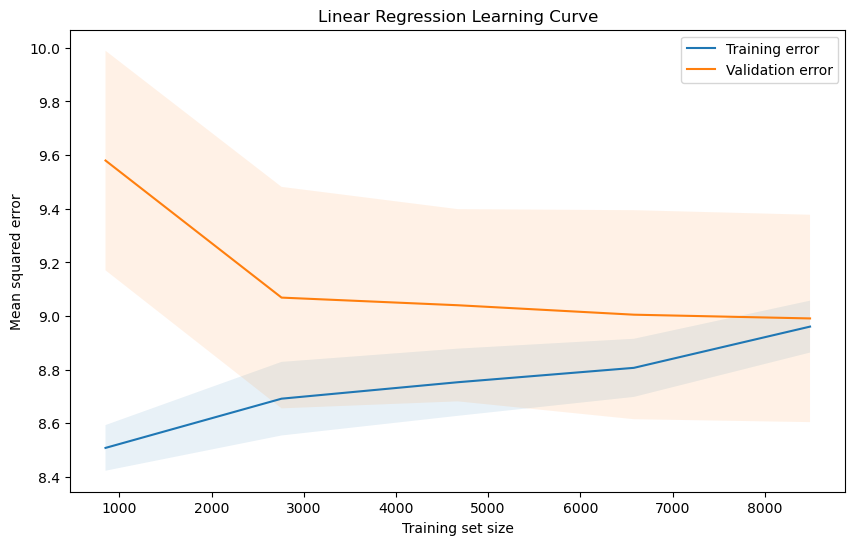

In [16]:
from sklearn.linear_model import LinearRegression

# create a KFold object with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# create a new Linear Regression model
reg = LinearRegression()

# define the parameter grid to search over
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False],
    'positive': [True, False],
}

# perform grid search with cross-validation
grid_search = GridSearchCV(reg, param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# get the best parameters and the best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

# create a new Linear Regression model with the best parameters found
reg_best = LinearRegression(**best_params)

# fit the model on the whole dataset
reg_best.fit(X_train, y_train)

# use the trained model to make predictions on the test set
y_pred_test = reg_best.predict(X_test)

# calculate the RMSE on the test set
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

# print the best parameters and the best score
print('Best parameters:', best_params)
print('Best mean squared error:', best_score)
print('RMSE on test set:', rmse_test)

# calculate training and validation scores using learning_curve
train_sizes, train_scores, valid_scores = learning_curve(reg_best, X_scaled, y, cv=kf, 
                                                          train_sizes=np.linspace(.1, 1.0, 5),
                                                          scoring='neg_mean_squared_error')

# calculate mean and standard deviation of training and validation scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = -np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, valid_mean, label='Validation error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('Linear Regression Learning Curve')
plt.legend()
plt.show()


In [17]:
# use the trained model to make predictions on the test set
y_pred_test = reg_best.predict(X_test)

# compute the RMSE on the test set
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print("RMSE on test set: {:.2f}".format(rmse_test))

from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred_test)
print("The R-Squared score of our model is {}%".format(r2_score))

# Calcolo del MAE
mae = mean_absolute_error(y_test, y_pred_test)

# Calcolo della deviazione standard dell'errore assoluto medio
std_mae = np.std(np.abs(y_test - y_pred_test))

print('MAE:', mae)
print('Standard deviation of MAE:', std_mae)

msle = mean_squared_log_error(np.exp(y_test), np.exp(y_pred_test))
print('Mean Squared Log Error (MSLE):', msle)


RMSE on test set: 2.94
The R-Squared score of our model is 0.3044444263997219%
MAE: 2.2896216969269716
Standard deviation of MAE: 1.8509333660601384
Mean Squared Log Error (MSLE): 7.730470753611364


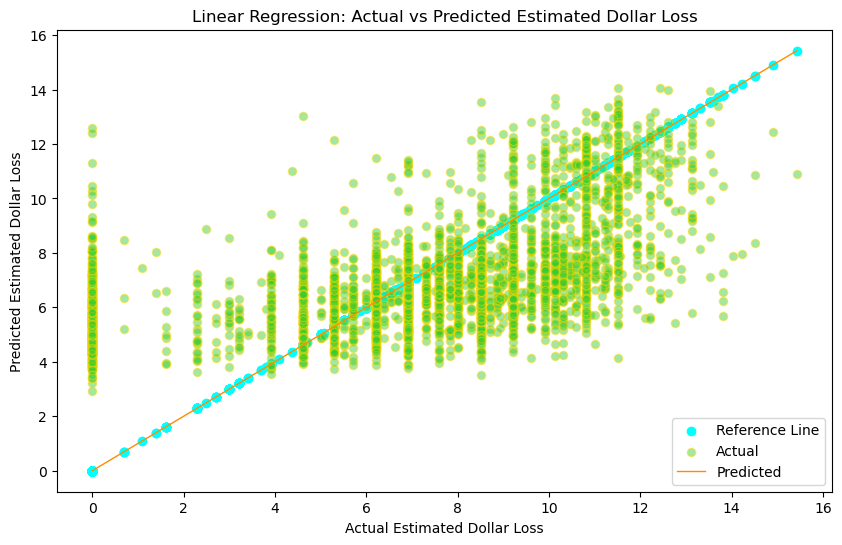

In [18]:
# Creazione dello scatter plot
plt.figure(figsize=(10, 6))

# Grafico dei valori effettivi
plt.scatter(y_test, y_test, c='cyan', alpha=1)

# Grafico delle predizioni
plt.scatter(y_test, y_pred_test, c='limegreen', edgecolors='gold', alpha=0.45)

# Asse x e asse y
plt.xlabel("Actual Estimated Dollar Loss")
plt.ylabel("Predicted Estimated Dollar Loss")

# Titolo del grafico
plt.title("Linear Regression: Actual vs Predicted Estimated Dollar Loss")

# Creazione di una linea di riferimento diagonale (valori reali = valori predetti)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='darkorange', linewidth=1)

# Legenda del grafico
plt.legend(['Reference Line', 'Actual', 'Predicted'], loc='lower right')

# Visualizzazione del grafico
plt.show()


## Random Forest Regressor

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best mean squared error: 5.773187576665235
RMSE on test set: 2.3565822837312496


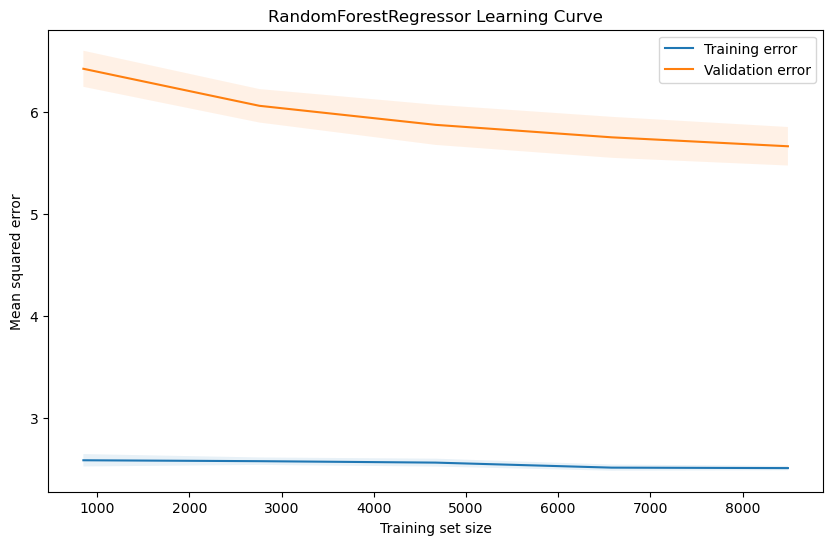

In [19]:
from sklearn.ensemble import RandomForestRegressor

# create a KFold object with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# create a new Random Forest Regressor model
reg = RandomForestRegressor(random_state=42)

# define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(reg, param_grid, cv=kf, scoring='neg_mean_squared_error')

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# get the best parameters and the best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

# create a new Random Forest Regressor model with the best parameters found
reg_best = RandomForestRegressor(**best_params, random_state=42)

# calculate training and validation scores using learning_curve
train_sizes, train_scores, valid_scores = learning_curve(reg_best, X_scaled, y, cv=kf, 
                                                          train_sizes=np.linspace(.1, 1.0, 5),
                                                          scoring='neg_mean_squared_error')

# calculate mean and standard deviation of training and validation scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = -np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# fit the best model on the whole dataset
reg_best.fit(X_train, y_train)

# use the trained model to make predictions on the test set
y_pred_test = reg_best.predict(X_test)

# calculate the RMSE on the test set
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

# print the best parameters and the best score
print('Best parameters:', best_params)
print('Best mean squared error:', best_score)
print('RMSE on test set:', rmse_test)

# plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, valid_mean, label='Validation error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('RandomForestRegressor Learning Curve')
plt.legend()
plt.show()


In [20]:
# use the trained model to make predictions on the test set
y_pred_test = reg_best.predict(X_test)

# compute the RMSE on the test set
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print("RMSE on test set: {:.2f}".format(rmse_test))

from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred_test)
print("The R-Squared score of our model is {}%".format(r2_score))

# Calcolo del MAE
mae = mean_absolute_error(y_test, y_pred_test)

# Calcolo della deviazione standard dell'errore assoluto medio
std_mae = np.std(np.abs(y_test - y_pred_test))

print('MAE:', mae)
print('Standard deviation of MAE:', std_mae)

msle = mean_squared_log_error(np.exp(y_test), np.exp(y_pred_test))
print('Mean Squared Log Error (MSLE):', msle)


RMSE on test set: 2.36
The R-Squared score of our model is 0.5543827190978017%
MAE: 1.7543683258995018
Standard deviation of MAE: 1.5734267816064933
Mean Squared Log Error (MSLE): 4.884770105111228


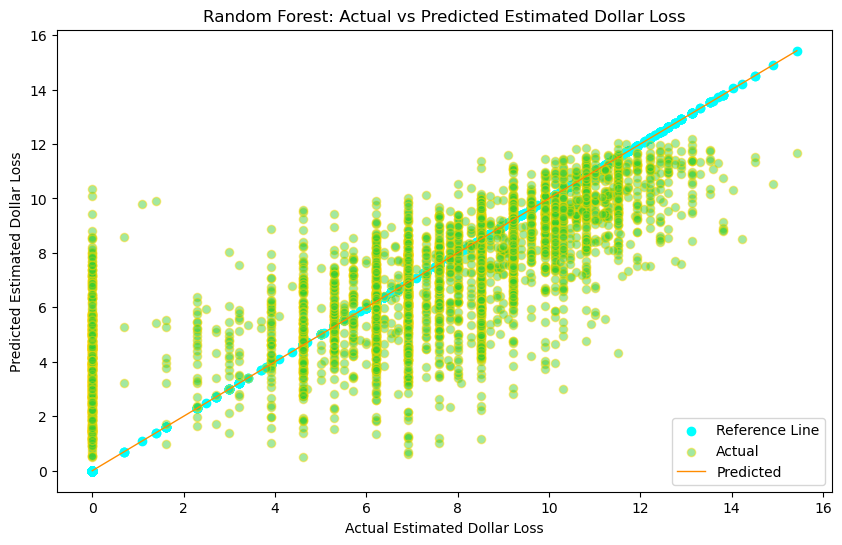

In [21]:
# Creazione dello scatter plot
plt.figure(figsize=(10, 6))

# Grafico dei valori effettivi
plt.scatter(y_test, y_test, c='cyan', alpha=1)

# Grafico delle predizioni
plt.scatter(y_test, y_pred_test, c='limegreen', edgecolors='gold', alpha=0.45)

# Asse x e asse y
plt.xlabel("Actual Estimated Dollar Loss")
plt.ylabel("Predicted Estimated Dollar Loss")

# Titolo del grafico
plt.title("Random Forest: Actual vs Predicted Estimated Dollar Loss")

# Creazione di una linea di riferimento diagonale (valori reali = valori predetti)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='darkorange', linewidth=1)

# Legenda del grafico
plt.legend(['Reference Line', 'Actual', 'Predicted'], loc='lower right')

# Visualizzazione del grafico
plt.show()


## Gradient Boosting

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best mean squared error: 5.660125822417488
RMSE on test set: 2.3519198675239528


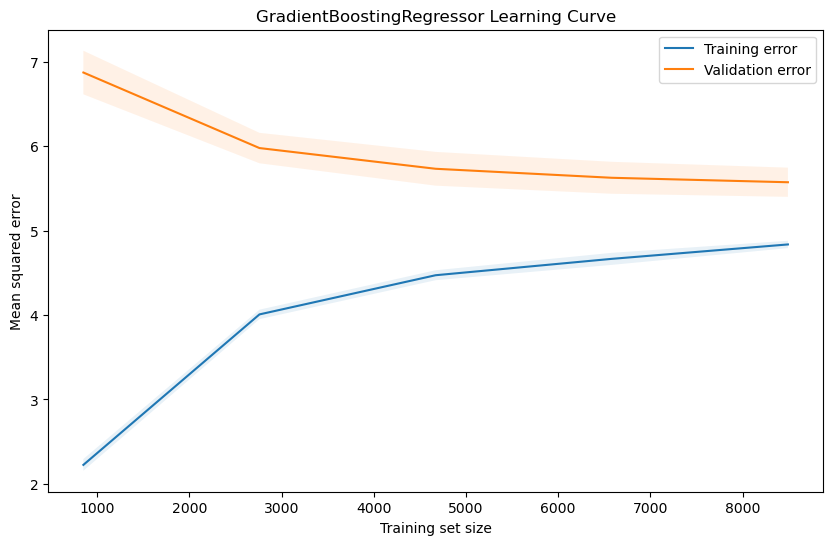

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

# create a KFold object with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# create a new Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(random_state=42)

# define the parameter grid to search over
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200]
}

# create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(gbr, param_grid, cv=kf, scoring='neg_mean_squared_error')

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# get the best parameters and the best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

# create a new GradientBoostingRegressor model with the best parameters found
gbr_best = GradientBoostingRegressor(**best_params, random_state=42)

# calculate training and validation scores using learning_curve
train_sizes, train_scores, valid_scores = learning_curve(gbr_best, X_scaled, y, cv=kf, 
                                                          train_sizes=np.linspace(.1, 1.0, 5),
                                                          scoring='neg_mean_squared_error')

# calculate mean and standard deviation of training and validation scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = -np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# fit the best model on the whole dataset
gbr_best.fit(X_train, y_train)

# use the trained model to make predictions on the test set
y_pred_test = gbr_best.predict(X_test)

# calculate the RMSE on the test set
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

# print the best parameters and the best score
print('Best parameters:', best_params)
print('Best mean squared error:', best_score)
print('RMSE on test set:', rmse_test)

# plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, valid_mean, label='Validation error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('GradientBoostingRegressor Learning Curve')
plt.legend()
plt.show()


In [23]:
# use the trained model to make predictions on the test set
y_pred_test = gbr_best.predict(X_test)

# compute the RMSE on the test set
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print("RMSE on test set: {:.2f}".format(rmse_test))

from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred_test)
print("The R-Squared score of our model is {}%".format(r2_score))

# Calcolo del MAE
mae = mean_absolute_error(y_test, y_pred_test)

# Calcolo della deviazione standard dell'errore assoluto medio
std_mae = np.std(np.abs(y_test - y_pred_test))

print('MAE:', mae)
print('Standard deviation of MAE:', std_mae)

msle = mean_squared_log_error(np.exp(y_test), np.exp(y_pred_test))
print('Mean Squared Log Error (MSLE):', msle)

RMSE on test set: 2.35
The R-Squared score of our model is 0.5561442514361167%
MAE: 1.745994888990009
Standard deviation of MAE: 1.5757629615125037
Mean Squared Log Error (MSLE): 4.869733900204891


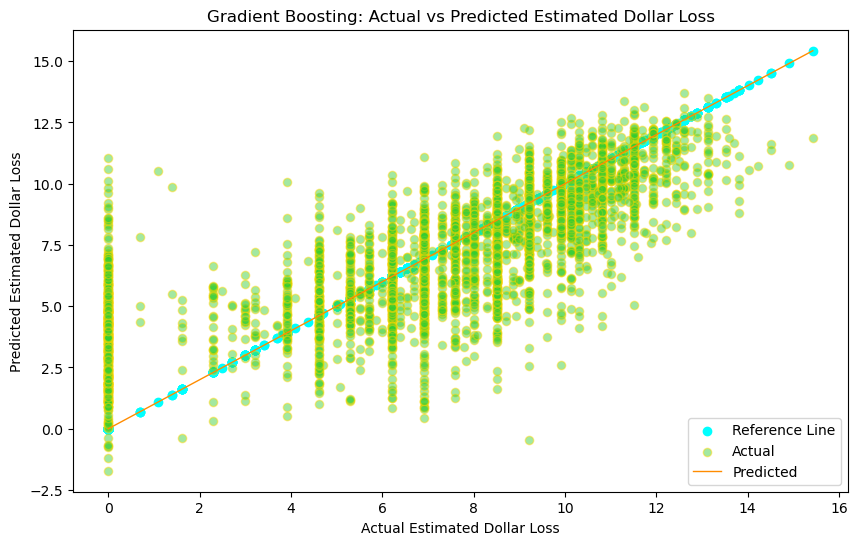

In [24]:
# Creazione dello scatter plot
plt.figure(figsize=(10, 6))

# Grafico dei valori effettivi
plt.scatter(y_test, y_test, c='cyan', alpha=1)

# Grafico delle predizioni
plt.scatter(y_test, y_pred_test, c='limegreen', edgecolors='gold', alpha=0.45)

# Asse x e asse y
plt.xlabel("Actual Estimated Dollar Loss")
plt.ylabel("Predicted Estimated Dollar Loss")

# Titolo del grafico
plt.title("Gradient Boosting: Actual vs Predicted Estimated Dollar Loss")

# Creazione di una linea di riferimento diagonale (valori reali = valori predetti)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='darkorange', linewidth=1)

# Legenda del grafico
plt.legend(['Reference Line', 'Actual', 'Predicted'], loc='lower right')

# Visualizzazione del grafico
plt.show()


## Support Vector Regression

Best parameters: {'C': 10, 'epsilon': 1, 'kernel': 'rbf'}
Best mean squared error: 7.112977776093532
RMSE on test set: 2.3565822837312496


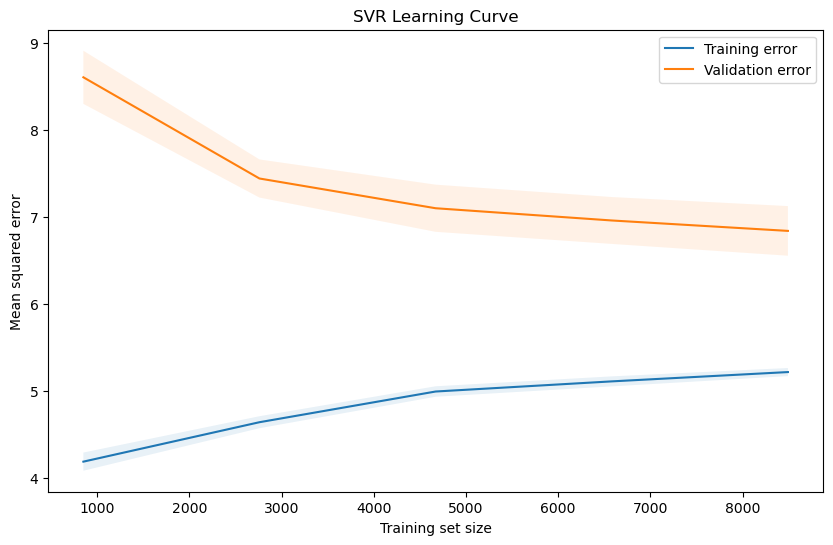

In [25]:
from sklearn.svm import SVR

# create a KFold object with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# create a new SVR model
svr = SVR()

# define the parameter grid to search over
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
}

# perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# get the best parameters and the best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

# create a new SVR model with the best parameters found
svr_best = SVR(**best_params)

# fit the model on the whole dataset
svr_best.fit(X_train, y_train)

# use the trained model to make predictions on the test set
y_pred_test = reg_best.predict(X_test)

# calculate the RMSE on the test set
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

# print the best parameters and the best score
print('Best parameters:', best_params)
print('Best mean squared error:', best_score)
print('RMSE on test set:', rmse_test)

# calculate training and validation scores using learning_curve
train_sizes, train_scores, valid_scores = learning_curve(svr_best, X_scaled, y, cv=kf, 
                                                          train_sizes=np.linspace(.1, 1.0, 5),
                                                          scoring='neg_mean_squared_error')

# calculate mean and standard deviation of training and validation scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = -np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, valid_mean, label='Validation error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('SVR Learning Curve')
plt.legend()
plt.show()


In [26]:
# use the trained model to make predictions on the test set
y_pred_test = svr_best.predict(X_test)

# compute the RMSE on the test set
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print("RMSE on test set: {:.2f}".format(rmse_test))

from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred_test)
print("The R-Squared score of our model is {}%".format(r2_score))

# Calcolo del MAE
mae = mean_absolute_error(y_test, y_pred_test)

# Calcolo della deviazione standard dell'errore assoluto medio
std_mae = np.std(np.abs(y_test - y_pred_test))

print('MAE:', mae)
print('Standard deviation of MAE:', std_mae)

msle = mean_squared_log_error(np.exp(y_test), np.exp(y_pred_test))
print('Mean Squared Log Error (MSLE):', msle)


RMSE on test set: 2.59
The R-Squared score of our model is 0.4620568939102684%
MAE: 1.8925606847277316
Standard deviation of MAE: 1.7670029622302792
Mean Squared Log Error (MSLE): 5.914723152227705


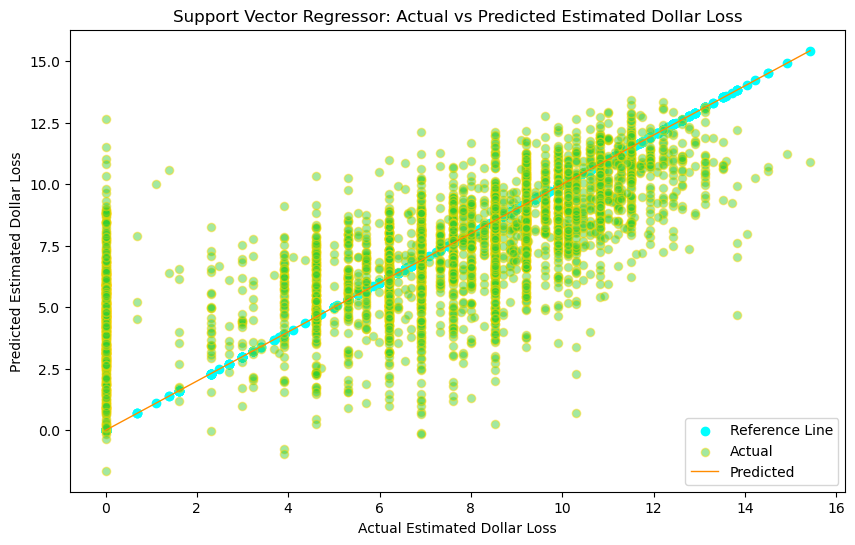

In [27]:
# Creazione dello scatter plot
plt.figure(figsize=(10, 6))

# Grafico dei valori effettivi
plt.scatter(y_test, y_test, c='cyan', alpha=1)

# Grafico delle predizioni
plt.scatter(y_test, y_pred_test, c='limegreen', edgecolors='gold', alpha=0.45)

# Asse x e asse y
plt.xlabel("Actual Estimated Dollar Loss")
plt.ylabel("Predicted Estimated Dollar Loss")

# Titolo del grafico
plt.title("Support Vector Regressor: Actual vs Predicted Estimated Dollar Loss")

# Creazione di una linea di riferimento diagonale (valori reali = valori predetti)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='darkorange', linewidth=1)

# Legenda del grafico
plt.legend(['Reference Line', 'Actual', 'Predicted'], loc='lower right')

# Visualizzazione del grafico
plt.show()


## Decision Tree

Best parameters: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 20}
Best mean squared error: 6.674293039065792
RMSE on test set: 2.532252910221453


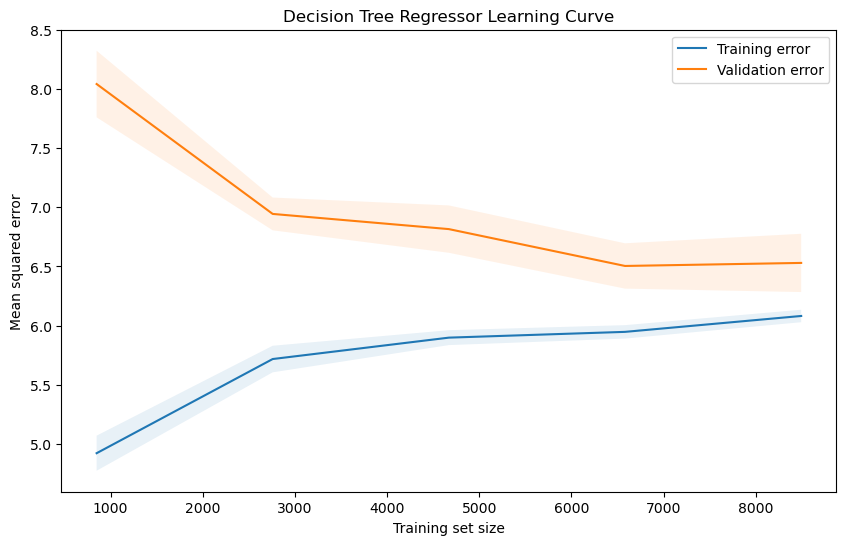

In [28]:
from sklearn.tree import DecisionTreeRegressor

# create a KFold object with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# create a new Decision Tree Regressor model
dct = DecisionTreeRegressor(random_state=42)

# define the parameter grid to search over
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
}

# create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(dct, param_grid, cv=kf, scoring='neg_mean_squared_error')

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# get the best parameters and the best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

# create a new Decision Tree Regressor model with the best parameters found
dct_best = DecisionTreeRegressor(**best_params)

# calculate training and validation scores using learning_curve
train_sizes, train_scores, valid_scores = learning_curve(dct_best, X_scaled, y, cv=kf, 
                                                          train_sizes=np.linspace(.1, 1.0, 5),
                                                          scoring='neg_mean_squared_error')

# calculate mean and standard deviation of training and validation scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = -np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# fit the best model on the whole dataset
dct_best.fit(X_train, y_train)

# use the trained model to make predictions on the test set
y_pred_test = dct_best.predict(X_test)

# calculate the RMSE on the test set
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

# print the best parameters and the best score
print('Best parameters:', best_params)
print('Best mean squared error:', best_score)
print('RMSE on test set:', rmse_test)

# plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, valid_mean, label='Validation error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('Decision Tree Regressor Learning Curve')
plt.legend()
plt.show()


In [29]:
# use the trained model to make predictions on the test set
y_pred_test = dct_best.predict(X_test)

# compute the RMSE on the test set
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print("RMSE on test set: {:.2f}".format(rmse_test))

from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred_test)
print("The R-Squared score of our model is {}%".format(r2_score))

# Calcolo del MAE
mae = mean_absolute_error(y_test, y_pred_test)

# Calcolo della deviazione standard dell'errore assoluto medio
std_mae = np.std(np.abs(y_test - y_pred_test))

print('MAE:', mae)
print('Standard deviation of MAE:', std_mae)

msle = mean_squared_log_error(np.exp(y_test), np.exp(y_pred_test))
print('Mean Squared Log Error (MSLE):', msle)


RMSE on test set: 2.53
The R-Squared score of our model is 0.48546968765300136%
MAE: 1.8957210968158573
Standard deviation of MAE: 1.6788526809736215
Mean Squared Log Error (MSLE): 5.695303683078086


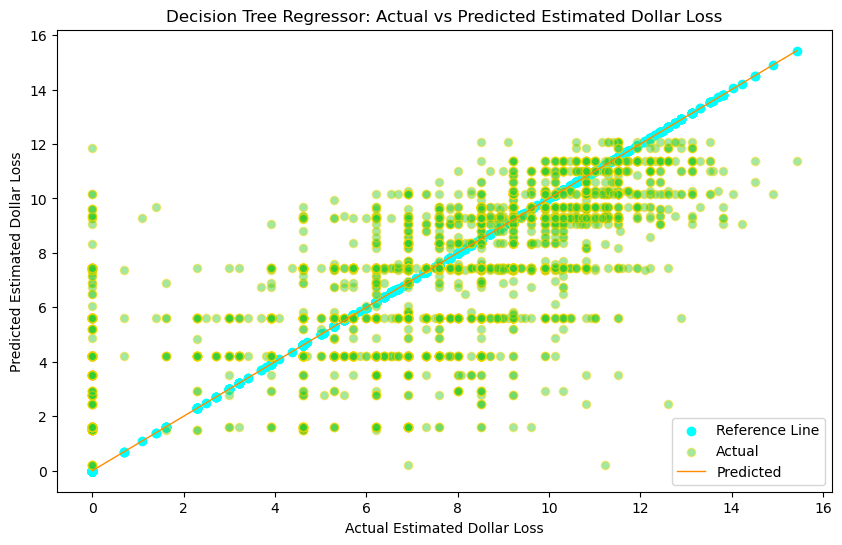

In [30]:
# Creazione dello scatter plot
plt.figure(figsize=(10, 6))

# Grafico dei valori effettivi
plt.scatter(y_test, y_test, c='cyan', alpha=1)

# Grafico delle predizioni
plt.scatter(y_test, y_pred_test, c='limegreen', edgecolors='gold', alpha=0.45)

# Asse x e asse y
plt.xlabel("Actual Estimated Dollar Loss")
plt.ylabel("Predicted Estimated Dollar Loss")

# Titolo del grafico
plt.title("Decision Tree Regressor: Actual vs Predicted Estimated Dollar Loss")

# Creazione di una linea di riferimento diagonale (valori reali = valori predetti)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='darkorange', linewidth=1)

# Legenda del grafico
plt.legend(['Reference Line', 'Actual', 'Predicted'], loc='lower right')

# Visualizzazione del grafico
plt.show()


## K-Nearest Neighbor

Best parameters: {'algorithm': 'brute', 'n_neighbors': 9, 'weights': 'distance'}
Best mean squared error: 8.795878420377658
RMSE on test set: 2.936700706755837


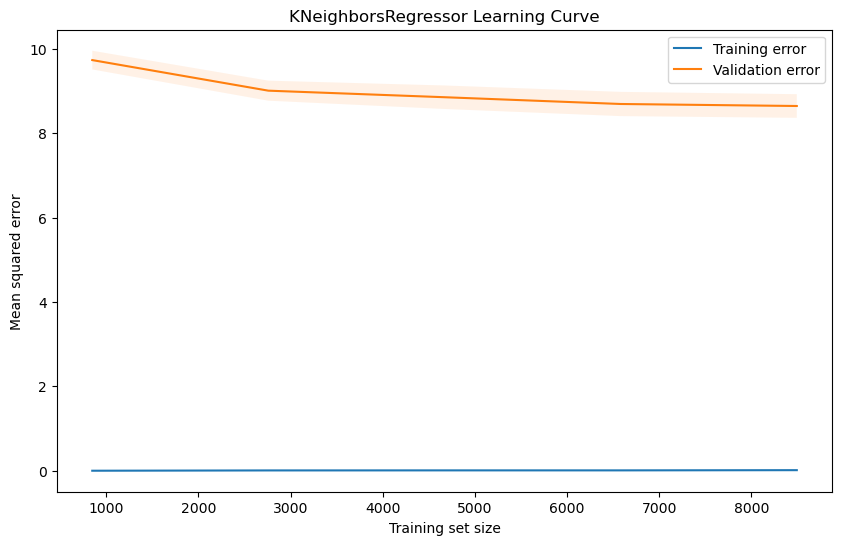

In [31]:
from sklearn.neighbors import KNeighborsRegressor

# create a KFold object with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# create a new KNeighborsRegressor model
knn = KNeighborsRegressor()

# define the parameter grid to search over
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=kf, scoring='neg_mean_squared_error')

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# get the best parameters and the best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

# create a new KNeighborsRegressor model with the best parameters found
knn_best = KNeighborsRegressor(**best_params)

# calculate training and validation scores using learning_curve
train_sizes, train_scores, valid_scores = learning_curve(knn_best, X_scaled, y, cv=kf, 
                                                          train_sizes=np.linspace(.1, 1.0, 5),
                                                          scoring='neg_mean_squared_error')

# calculate mean and standard deviation of training and validation scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = -np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# fit the best model on the whole dataset
knn_best.fit(X_train, y_train)

# use the trained model to make predictions on the test set
y_pred_test = knn_best.predict(X_test)

# calculate the RMSE on the test set
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

# print the best parameters and the best score
print('Best parameters:', best_params)
print('Best mean squared error:', best_score)
print('RMSE on test set:', rmse_test)

# plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, valid_mean, label='Validation error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('KNeighborsRegressor Learning Curve')
plt.legend()
plt.show()


In [32]:
# use the trained model to make predictions on the test set
y_pred_test = knn_best.predict(X_test)

# compute the RMSE on the test set
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print("RMSE on test set: {:.2f}".format(rmse_test))

from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred_test)
print("The R-Squared score of our model is {}%".format(r2_score))

# Calcolo del MAE
mae = mean_absolute_error(y_test, y_pred_test)

# Calcolo della deviazione standard dell'errore assoluto medio
std_mae = np.std(np.abs(y_test - y_pred_test))

print('MAE:', mae)
print('Standard deviation of MAE:', std_mae)

msle = mean_squared_log_error(np.exp(y_test), np.exp(y_pred_test))
print('Mean Squared Log Error (MSLE):', msle)


RMSE on test set: 2.94
The R-Squared score of our model is 0.3079839249397156%
MAE: 2.2350747164308067
Standard deviation of MAE: 1.9049021111416673
Mean Squared Log Error (MSLE): 7.789607924907966


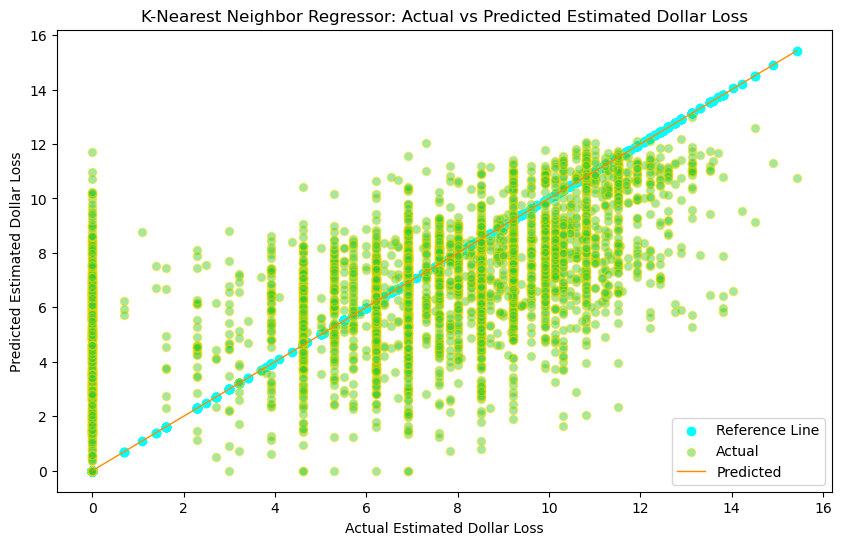

In [33]:
# Creazione dello scatter plot
plt.figure(figsize=(10, 6))

# Grafico dei valori effettivi
plt.scatter(y_test, y_test, c='cyan', alpha=1)

# Grafico delle predizioni
plt.scatter(y_test, y_pred_test, c='limegreen', edgecolors='gold', alpha=0.45)

# Asse x e asse y
plt.xlabel("Actual Estimated Dollar Loss")
plt.ylabel("Predicted Estimated Dollar Loss")

# Titolo del grafico
plt.title("K-Nearest Neighbor Regressor: Actual vs Predicted Estimated Dollar Loss")

# Creazione di una linea di riferimento diagonale (valori reali = valori predetti)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='darkorange', linewidth=1)

# Legenda del grafico
plt.legend(['Reference Line', 'Actual', 'Predicted'], loc='lower right')

# Visualizzazione del grafico
plt.show()


## Confronto Risultati

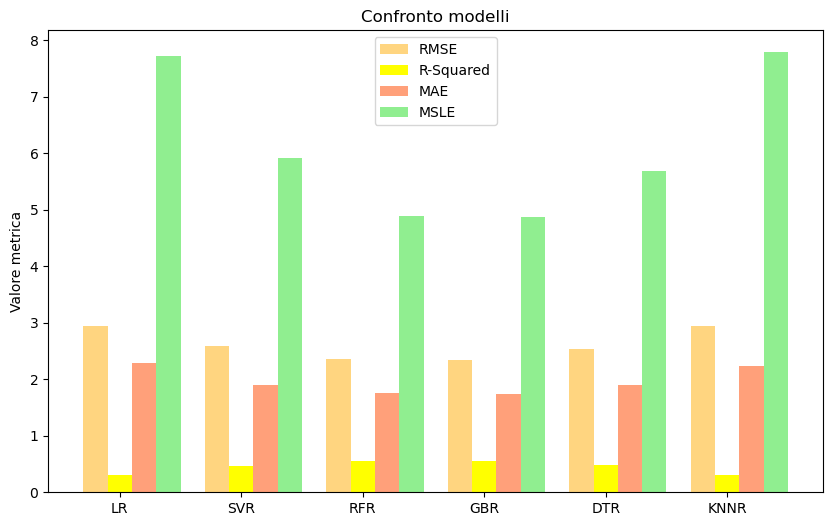

In [34]:
# Dati di esempio per i risultati dei modelli
model_names = ['LR', 'SVR', 'RFR', 'GBR', 'DTR', 'KNNR']
rmse_scores = [2.94, 2.59, 2.36, 2.35, 2.53, 2.94]
r_squared_scores = [0.304, 0.462, 0.554, 0.556, 0.485, 0.307]
mae_scores = [2.289, 1.892, 1.754, 1.745, 1.895, 2.235]
msle_scores = [7.730, 5.914, 4.884, 4.869, 5.695, 7.789]

# Calcolo della larghezza delle barre
bar_width = 0.2
fig, ax = plt.subplots(figsize=(10, 6))
# Posizione delle barre sul grafico
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Creazione del grafico
plt.bar(r1, rmse_scores, color='#FFD580', width=bar_width, label='RMSE')
plt.bar(r2, r_squared_scores, color='yellow', width=bar_width, label='R-Squared')
plt.bar(r3, mae_scores, color='#FFA07A', width=bar_width, label='MAE')
plt.bar(r4, msle_scores, color='#90EE90', width=bar_width, label='MSLE')

# Etichette sull'asse X
plt.xticks([r + bar_width for r in range(len(model_names))], model_names)

# Etichette asse Y
plt.ylabel('Valore metrica')

# Titolo del grafico
plt.title('Confronto modelli')

# Legenda
plt.legend()

# Visualizzazione del grafico
plt.show()
